# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import Data

In [2]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# handling data missing value
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Handling outlier

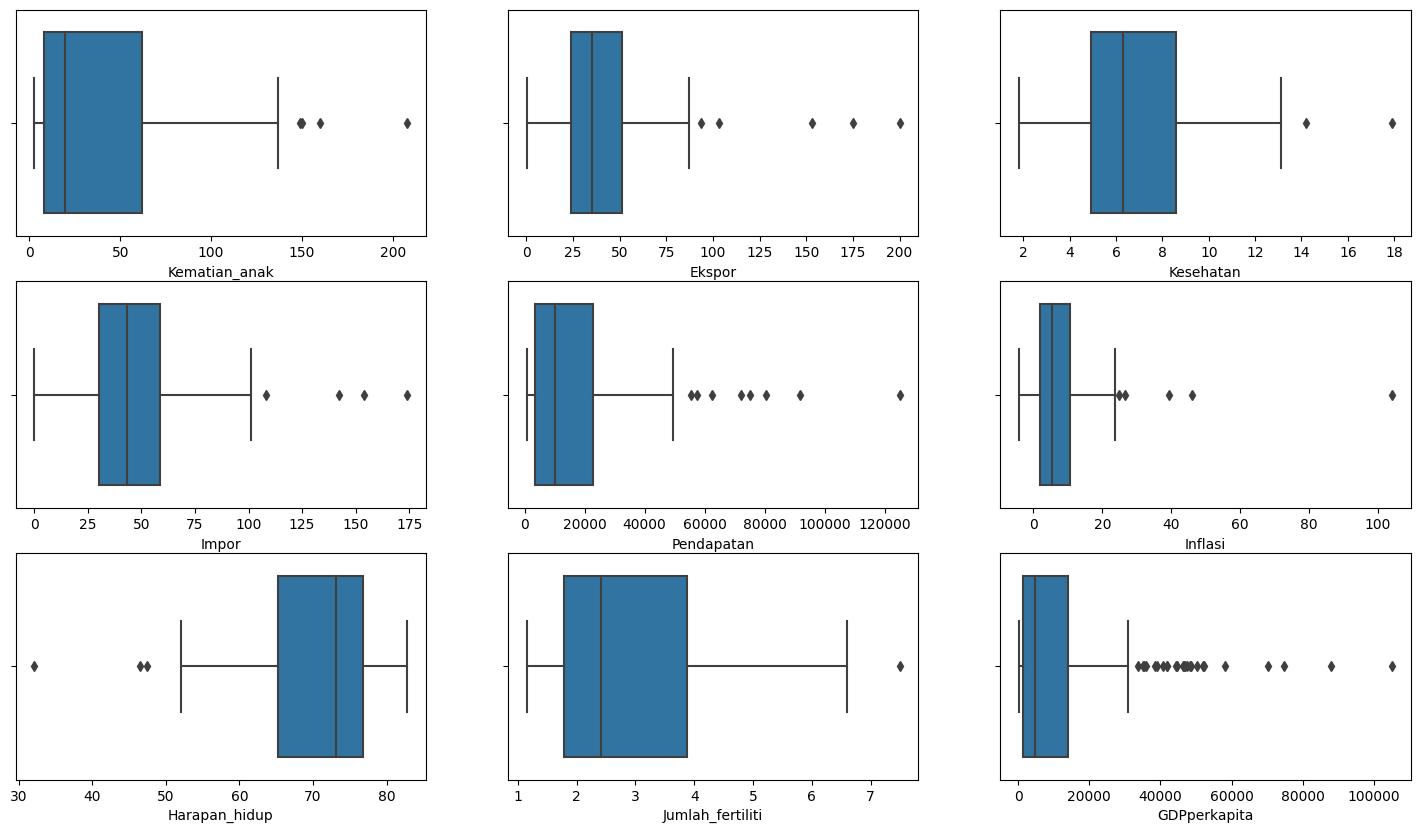

In [5]:
plt.figure(figsize = (18, 10))
for index, column in enumerate(df.describe().columns):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x = column, data = df)
plt.show()

In [6]:
def get_lower_upper_bound(x):
  q1 = np.percentile(x, 25)
  q3 = np.percentile(x, 75)
  iqr = q3-q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)
  return lower_bound, upper_bound

def get_outliers_iqr(x):
  lower_bound, upper_bound = get_lower_upper_bound(x)
  return x[np.where((x > upper_bound) | (x < lower_bound))]

In [9]:
for index, column in enumerate(df.describe().columns):
  print(column, ' = ', get_outliers_iqr(df[column].values))

Kematian_anak  =  [149. 150. 208. 160.]
Ekspor  =  [103.  175.  153.   93.8 200. ]
Kesehatan  =  [14.2 17.9]
Impor  =  [142. 154. 108. 174.]
Pendapatan  =  [ 80600  75200  91700  62300 125000  72100  55500  57600]
Inflasi  =  [ 24.9  39.2 104.   26.5  45.9]
Harapan_hidup  =  [47.5 32.1 46.5]
Jumlah_fertiliti  =  [7.49]
GDPperkapita  =  [ 51900  46900  44400  35300  47400  58000  46200  40600  41800  41900
  48700  35800  44500  38500 105000  50300  33700  87800  70300  46600
  52100  74600  35000  38900  48400]


In [10]:
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [11]:
def remove_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  df_final = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
  return df_final

In [12]:
df_outlier_removed = remove_outlier_IQR(df)

df_outlier_removed.dropna(axis=0, inplace=True)

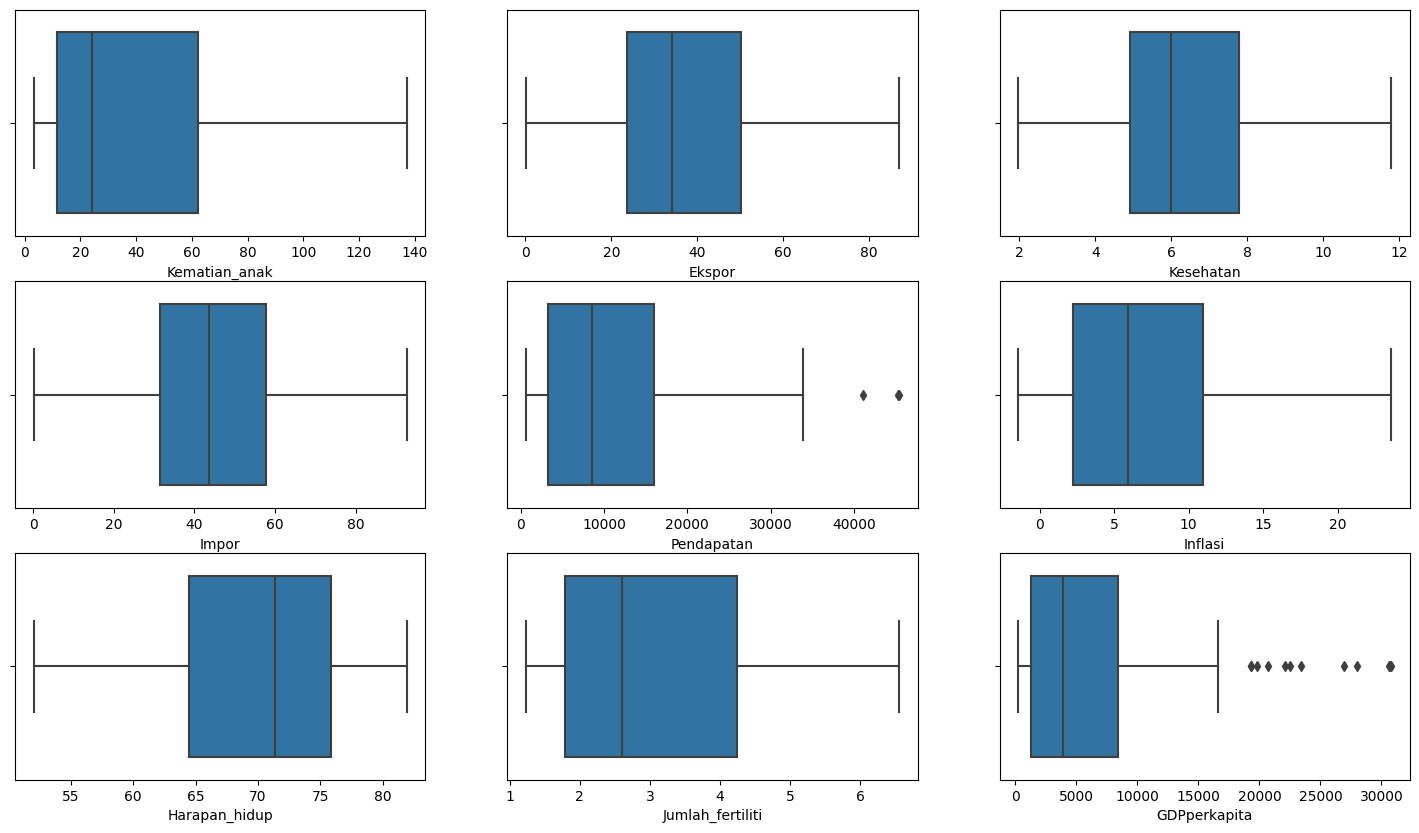

In [14]:
plt.figure(figsize = (18, 10))
for index, column in enumerate(df_outlier_removed.describe().columns):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x = column, data = df_outlier_removed)
plt.show()

In [13]:
df_outlier_removed

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


# Exploring Data

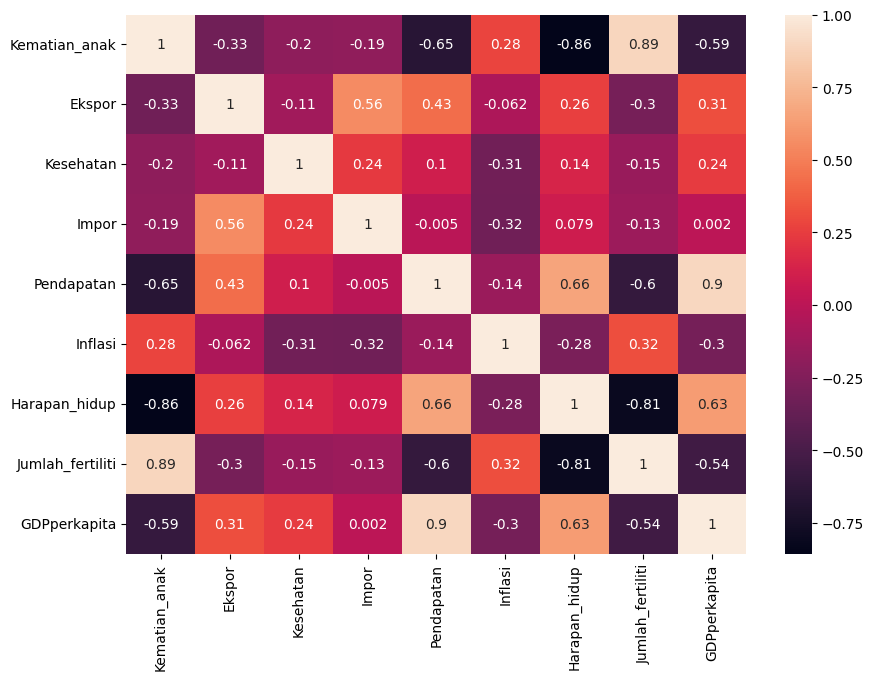

In [16]:
plt.figure(figsize = (10, 7))
sns.heatmap(df_outlier_removed.corr(), annot = True)
plt.show()

In [17]:
df_outlier_removed.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,38.799219,37.427336,6.345000,45.127077,11149.851562,7.339727,69.694531,3.020781,6426.187500
std,33.964248,18.794958,2.213079,17.771282,9774.820899,6.145248,7.408596,1.465922,7142.127941
min,3.200000,0.109000,1.970000,0.065900,609.000000,-1.430000,52.000000,1.230000,231.000000
25%,11.700000,23.550000,4.912500,31.375000,3225.000000,2.255000,64.450000,1.795000,1305.000000
50%,24.100000,34.000000,6.005000,43.500000,8510.000000,5.935000,71.350000,2.600000,3885.000000
75%,62.200000,50.275000,7.790000,57.650000,16050.000000,10.950000,75.850000,4.247500,8412.500000
max,137.000000,86.900000,11.800000,92.600000,45400.000000,23.600000,81.900000,6.550000,30800.000000


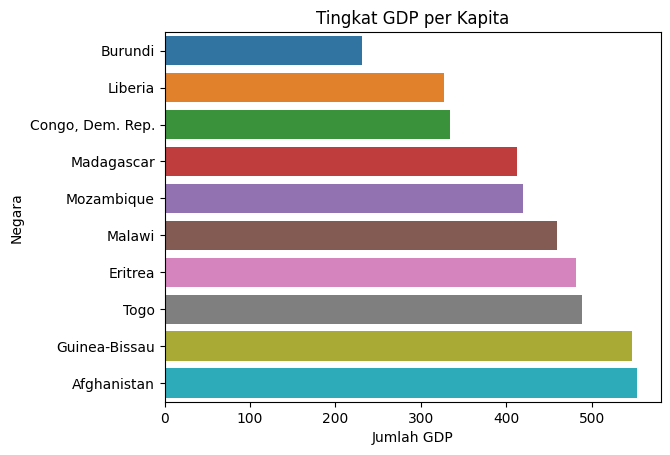

In [18]:
#10 Negara dengan GDP Perkapita terendah

gdp = df_outlier_removed.sort_values(by = ['GDPperkapita'], ascending = True)
sns.barplot(data = gdp[:10], x = 'GDPperkapita', y = 'Negara')
plt.title('Tingkat GDP per Kapita')
plt.xlabel('Jumlah GDP')
plt.ylabel('Negara')
plt.show()

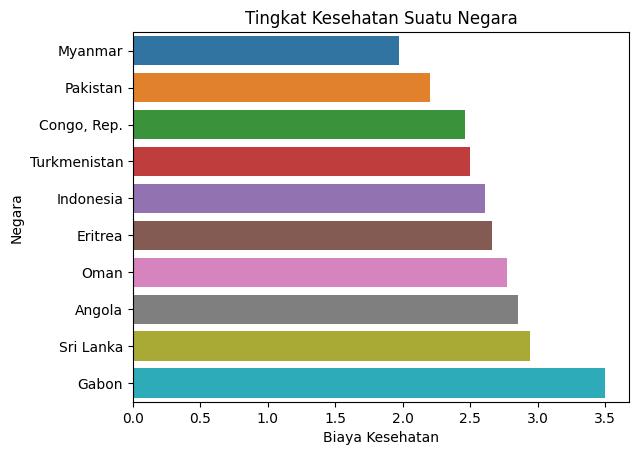

In [20]:
#10 Negara dengan tingkat kesehatan terendah

kesehatan = df_outlier_removed.sort_values(by = ['Kesehatan'], ascending = True)
sns.barplot(data = kesehatan[:10], x = 'Kesehatan', y = 'Negara')
plt.title('Tingkat Kesehatan Suatu Negara')
plt.xlabel('Biaya Kesehatan')
plt.ylabel('Negara')
plt.show()

# Clustering

In [21]:
# Melakukan scaling data
sc = StandardScaler()
df_sc = sc.fit_transform(df_outlier_removed[['GDPperkapita', 'Kesehatan']])

In [22]:
df_new = pd.DataFrame(data = df_sc, columns = ['GDPperkapita', 'Kesehatan'])
df_new

,GDPperkapita,Kesehatan
0,-0.825561,0.560239
1,-0.328385,0.092995
2,-0.276376,-0.986655
3,-0.407101,-1.585453
4,0.811593,-0.142895
...,...,...
123,-0.709315,-0.242695
124,-0.485817,-0.496730
125,-0.719154,0.224549
126,-0.719154,-0.528484


uji coba dengan 2 cluster

In [ ]:
kmeans1 = KMeans(n_clusters = 2, random_state = 42).fit(df_sc)
labels1 = kmeans1.labels_
labels1

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
df_new['Cluster'] = labels1

n_cluster = 2


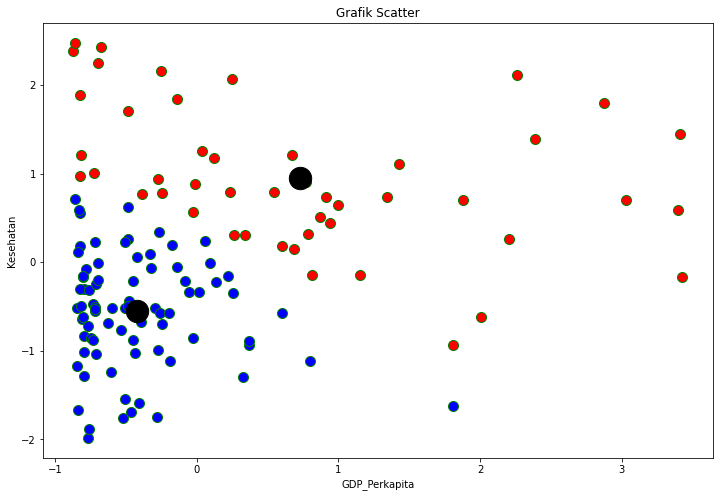

In [ ]:
print('n_cluster = 2')
plt.figure(figsize = (12, 8))

plt.scatter(df_new['GDPperkapita'][df_new.Cluster == 0], df_new['Kesehatan'][df_new.Cluster == 0], c='blue', s=100, edgecolors = 'green')
plt.scatter(df_new['GDPperkapita'][df_new.Cluster == 1], df_new['Kesehatan'][df_new.Cluster == 1], c='red', s=100, edgecolors = 'green')

centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)
plt.xlabel('GDP_Perkapita')
plt.ylabel('Kesehatan')
plt.title('Grafik Scatter')
plt.show()

clustering menggunakan methode elbow

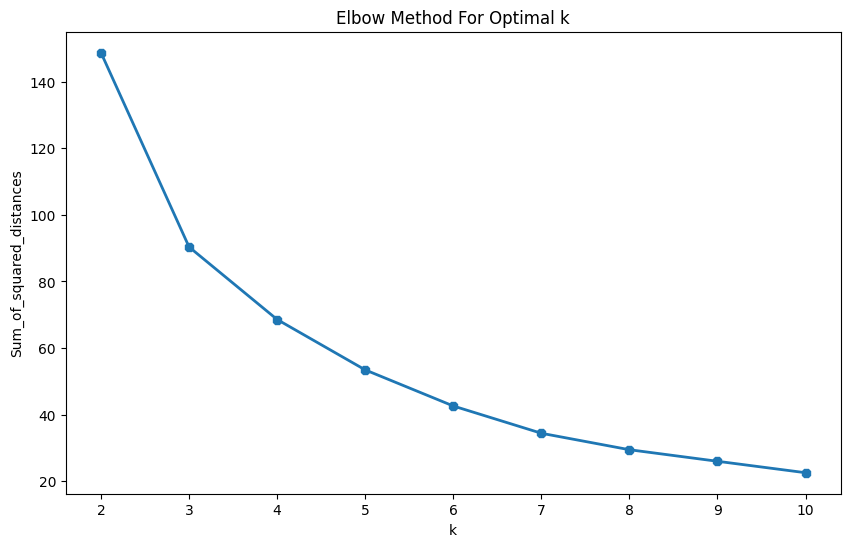

In [25]:
Sum_of_squared_distances = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, init = 'k-means++', random_state = 42)
    km = km.fit(df_new)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, Sum_of_squared_distances, linewidth = 2, marker = '8')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [28]:
# nilai score silhoutte akan dilihat score paling tertinggi untuk menentukan jumlah K

silhouette = []
K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(df_new)
    ss = silhouette_score(df_new, kmeans.labels_, metric='euclidean')
    silhouette.append(ss)
    
pd.DataFrame({'K' : K, 'Silhouette' : silhouette})

,K,Silhouette
0,2,0.435252
1,3,0.437368
2,4,0.434199
3,5,0.362486
4,6,0.382381
5,7,0.388556
6,8,0.396288
7,9,0.383897
8,10,0.370325


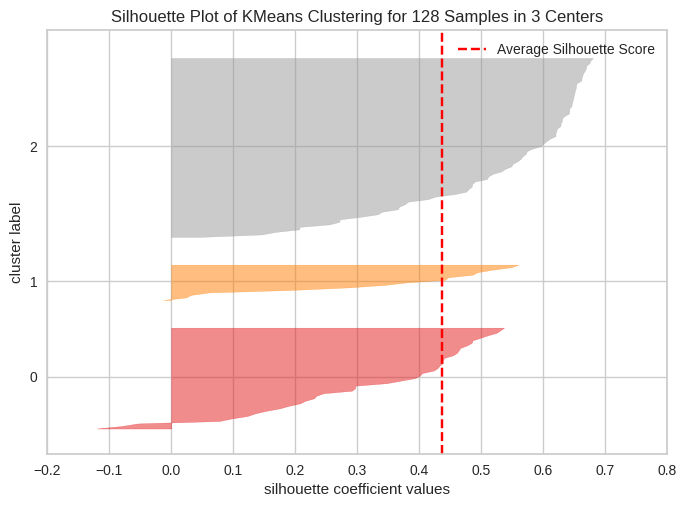

In [30]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.poof();

In [32]:
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state=42).fit(df_new)
labels2 = kmeans2.labels_
labels2

array([0, 2, 2, 2, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1,
       2, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2], dtype=int32)

In [33]:
df_outlier_removed['cluster'] = labels2
df_outlier_removed.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2


In [38]:
df_new['cluster'] = labels2

n_cluster =3


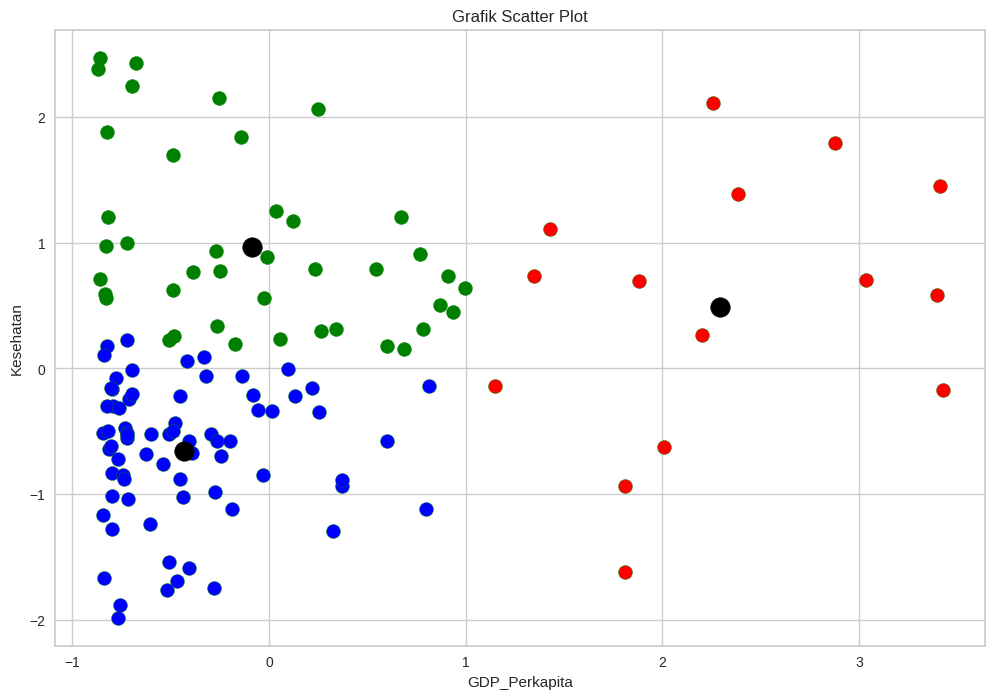

In [41]:
print('n_cluster =3')
plt.figure(figsize = (12, 8))
plt.scatter(df_new['GDPperkapita'][df_new.cluster == 0], df_new['Kesehatan'][df_new.cluster == 0], c='green', s=100, edgecolors = 'green')
plt.scatter(df_new['GDPperkapita'][df_new.cluster == 1], df_new['Kesehatan'][df_new.cluster == 1], c='red', s=100, edgecolors = 'green')
plt.scatter(df_new['GDPperkapita'][df_new.cluster == 2], df_new['Kesehatan'][df_new.cluster == 2], c='blue', s=100, edgecolors = 'green')

centers1 = kmeans2.cluster_centers_
plt.scatter(centers1[:, 0], centers1[:, 1], c='black', s=200)
plt.xlabel('GDP_Perkapita')
plt.ylabel('Kesehatan')
plt.title('Grafik Scatter Plot')
plt.show()

In [44]:
df_temp = df_outlier_removed[['Negara', 'Kesehatan', 'GDPperkapita', 'cluster']]
df_temp

,Negara,Kesehatan,GDPperkapita,cluster
0,Afghanistan,7.58,553.0,0
1,Albania,6.55,4090.0,2
2,Algeria,4.17,4460.0,2
3,Angola,2.85,3530.0,2
4,Antigua and Barbuda,6.03,12200.0,2
...,...,...,...,...
161,Uzbekistan,5.81,1380.0,2
162,Vanuatu,5.25,2970.0,2
164,Vietnam,6.84,1310.0,2
165,Yemen,5.18,1310.0,2


In [45]:
df_temp.groupby("cluster").agg(['mean', 'min','max'])

Kesehatan               GDPperkapita                  
             mean   min    max          mean      min      max
cluster                                                       
0        8.483902  6.68  11.80   5822.634146    231.0  13500.0
1        7.424667  2.77  11.00  22753.333333  14600.0  30800.0
2        4.902083  1.97   6.84   3368.388889    413.0  12200.0

salah satu penentu pembangunan suatu negara rendah adalah melihat dari tingkat kesehatan maupun pendapatan perkapita suatu negara. berdasarkan tabel statistik tersebut dapat dilihat klaster yang memiliki rata-rata tingkat kesehatan serta pendapatan terendah yaitu berada di klaster 2, oleh karena itu negara yang berada di **klaster 2 merupakan negara yang paling membutuhkan perhatian dan bantuan dari HELP International**.

In [46]:
df_outlier_removed.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
cluster             0
dtype: int64

daftar negara tiap klasternya

In [48]:
#klaster 0

cluster_0 = df_outlier_removed['cluster'] == 0
data_cluster_0 = df_outlier_removed[(cluster_0)]
data_cluster_0.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300.0,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720.0,1.40,76.8,1.31,4610.0,0
21,Botswana,52.5,43.6,8.30,51.3,13300.0,8.92,57.1,2.88,6350.0,0
22,Brazil,19.8,10.7,9.01,11.8,14500.0,8.41,74.2,1.80,11200.0,0


In [49]:
#klaster 1

cluster_1 = df_outlier_removed['cluster'] == 1
data_cluster_1 = df_outlier_removed[(cluster_1)]
data_cluster_1.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
10,Bahamas,13.8,35.0,7.89,43.7,22900.0,-0.393,73.8,1.86,28000.0,1
11,Bahrain,8.6,69.5,4.97,50.9,41100.0,7.440,76.0,2.16,20700.0,1
13,Barbados,14.2,39.5,7.97,48.7,15300.0,0.321,76.7,1.78,16000.0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900.0,2.010,79.9,1.42,30800.0,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300.0,-1.430,77.5,1.51,19800.0,1


In [50]:
#klaster 2

cluster_2 = df_outlier_removed['cluster'] == 2
data_cluster_2 = df_outlier_removed[(cluster_2)]
data_cluster_2.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,2
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,2
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,2
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220.0,2


**Daftar 10 negara yang membutuhkan bantuan**

In [51]:
data_cluster_2[['Negara', 'GDPperkapita', 'Kesehatan', 'cluster']].sort_values(by = ['GDPperkapita', 'Kesehatan'], ascending = True).head(10).reset_index(drop = True)

,Negara,GDPperkapita,Kesehatan,cluster
0,Madagascar,413.0,3.77,2
1,Mozambique,419.0,5.21,2
2,Malawi,459.0,6.59,2
3,Eritrea,482.0,2.66,2
4,Gambia,562.0,5.69,2
5,Burkina Faso,575.0,6.74,2
6,Nepal,592.0,5.25,2
7,Guinea,648.0,4.93,2
8,Tanzania,702.0,6.01,2
9,Mali,708.0,4.98,2
